In [1]:

import os
import pandas as pd
import numpy as np
import math
from collections import Counter


In [2]:
files = os.listdir('languageID')

In [3]:

data = pd.DataFrame()

for i,a in enumerate(files):
    with open(f'languageID/{a}', 'r') as f:
        text = f.read()
    data[i] = {'text': text, 'lang': a.split('.')[0]}
    
data = data.T
    

In [4]:
textdata = pd.DataFrame(index = None)
for i in range(len(data)):
    flag = sorted(Counter(data['text'][i].replace('\n', '')).items())
    flag =dict(flag)
    unique, counts = flag.keys(), flag.values()
    count = (dict(zip(unique, counts)))
    textdata[i] = {'content':(count), 'lang':data['lang'][i]}
textdata = textdata.T

In [5]:
smooth = 1
probdata = textdata.copy(deep=False)
for i in range(len(textdata)):
    data = textdata['content'][i].copy()
    total = sum(data.values())
    for i in data:
        data[i] = (data[i]+smooth)/(total+(smooth*len(data)+1))
    probdata['content'][i] = data

In [6]:
train = lambda n: [f"{n}{i}" for i in range(0,10)]
traine = train('e')
trainj = train('j')
trains = train('s')
trainlist = [traine, trainj, trains]

In [7]:
train = {}
for a in trainlist:
    merged_counter = Counter()
    for i in range(len(textdata)):
        if(textdata['lang'][i] in a):
            merged_counter.update(textdata['content'][i])

    merged_dict = dict(merged_counter)
    train[a[0][0]] = merged_dict

        

In [8]:
class_counts = {c: sum(train[c].values()) for c in train.keys()}
priors = {c: (class_counts[c] + 0.5) / ((sum(class_counts.values())) + 0.5 * (len(data)+1)) for c in train.keys()}

In [22]:
priors

{'e': 0.33134635824722497, 'j': 0.3133101763075136, 's': 0.35508048344857057}

In [10]:
thetae = {x : (train['e'][x]+0.5)/(sum(train['e'].values())+0.5*27) for x in train['e'].keys()}
thetaj = {x : (train['j'][x]+0.5)/(sum(train['j'].values())+0.5*27) for x in train['j'].keys()}
thetas = {x : (train['s'][x]+0.5)/(sum(train['s'].values())+0.5*27) for x in train['s'].keys()}
theta = {'e':thetae, 'j':thetaj, 's':thetas}

In [11]:
print(thetae)
print(thetaj)
print(thetas)

{' ': 0.1792499586981662, 'a': 0.0601685114819098, 'b': 0.011134974392863043, 'c': 0.021509995043779945, 'd': 0.021972575582355856, 'e': 0.1053692383941847, 'f': 0.018932760614571286, 'g': 0.017478936064761277, 'h': 0.047216256401784236, 'i': 0.055410540227986124, 'k': 0.0037336857756484387, 'l': 0.028977366595076822, 'm': 0.020518751032545846, 'n': 0.057921691723112505, 'o': 0.06446390219725756, 'p': 0.01675202378985627, 'r': 0.053824549810011564, 's': 0.06618205848339666, 't': 0.08012555757475633, 'u': 0.026664463902197257, 'v': 0.009284652238559392, 'w': 0.015496448042293078, 'y': 0.013844374690236246, 'z': 0.0006277878737815959, 'j': 0.001420783082768875, 'x': 0.001156451346439782, 'q': 0.0005617049396993227}
{' ': 0.12344945665466997, 'a': 0.1317656102589189, 'b': 0.010866906600510151, 'c': 0.005485866033054963, 'd': 0.01722631818022992, 'e': 0.06020475907613823, 'f': 0.003878542227191726, 'g': 0.014011670568503443, 'h': 0.03176211607673224, 'i': 0.09703343932352633, 'j': 0.002341

In [12]:
e10 = dict(textdata[textdata['lang']=='e10']['content'])[2]
print(e10)

{' ': 498, 'a': 164, 'b': 32, 'c': 53, 'd': 57, 'e': 311, 'f': 55, 'g': 51, 'h': 140, 'i': 140, 'j': 3, 'k': 6, 'l': 85, 'm': 64, 'n': 139, 'o': 182, 'p': 53, 'q': 3, 'r': 141, 's': 186, 't': 225, 'u': 65, 'v': 31, 'w': 47, 'x': 4, 'y': 38, 'z': 2}


In [13]:
ans5 = {}
for i in train.keys():
    prod = 0
    for j in e10.keys():
        if j in theta[i].keys():
            prod += math.log(theta[i][j])*e10[j]
    ans5[i] = prod
            
    

In [14]:
ans5

{'e': -7841.865447060634, 'j': -8730.385774627437, 's': -8467.282044010557}

In [15]:
ans6 = {}

for a in ans5.keys():
    ans6[a] = ans5[a] + math.log(priors[a])
    
sum = np.sum(list(ans6.values()))

print(ans6)
print(sum)

for a in ans6.keys():
    ans6[a] = ans6[a] - sum
    
ans6

{'e': -7842.9700381117955, 'j': -8731.546336227955, 's': -8468.31745481182}
-25042.83382915157


{'e': 17199.863791039774, 'j': 16311.287492923613, 's': 16574.51637433975}

In [23]:
def test(document):
    case = dict(textdata[textdata['lang']==document]['content'].reset_index(drop=True))[0]
    ans = {}
    for i in train.keys():
        prod = 0
        for j in case.keys():
            if j in theta[i].keys():
                prod += math.log(theta[i][j])*case[j]
        ans[i] = prod
    print(ans)
    return max(ans, key=ans.get)


In [24]:
test('e10')

{'e': -7841.865447060634, 'j': -8730.385774627437, 's': -8467.282044010557}


'e'

In [17]:
testx = lambda n: [f"{n}{i}" for i in range(10,20)]
testlist = [testx('e'), testx('j'), testx('s')]

In [18]:
y_true = []
y_pred = []
for i in testlist:
    for j in i:
        y_true.append(j.split('1')[0])
        y_pred.append(test(j))
            

In [19]:
def generate_confusion_matrix(y_true, y_pred):
    classes = sorted(set(y_true))  
    num_classes = len(classes)
    confusion_matrix = [[0] * num_classes for _ in range(num_classes)]

    class_index = {c: i for i, c in enumerate(classes)}  

    for true_label, predicted_label in zip(y_true, y_pred):
        true_index = class_index[true_label]
        pred_index = class_index[predicted_label]
        confusion_matrix[true_index][pred_index] += 1

    return classes, confusion_matrix

In [20]:
classes, confusion_matrix = generate_confusion_matrix(y_true, y_pred)


print("Classes:", classes)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

Classes: ['e', 'j', 's']
Confusion Matrix:
[10, 0, 0]
[0, 10, 0]
[0, 0, 10]


C:\Users\devme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch [1/100], Loss: 18.1662
Epoch [2/100], Loss: 15.3768
Epoch [3/100], Loss: 13.8968
Epoch [4/100], Loss: 12.8259
Epoch [5/100], Loss: 11.9801
Epoch [6/100], Loss: 11.2799
Epoch [7/100], Loss: 10.6812
Epoch [8/100], Loss: 10.1577
Epoch [9/100], Loss: 9.6944
Epoch [10/100], Loss: 9.2841
Epoch [11/100], Loss: 8.9234
Epoch [12/100], Loss: 8.6089
Epoch [13/100], Loss: 8.3354
Epoch [14/100], Loss: 8.0957
Epoch [15/100], Loss: 7.8817
Epoch [16/100], Loss: 7.6868
Epoch [17/100], Loss: 7.5057
Epoch [18/100], Loss: 7.3351
Epoch [19/100], Loss: 7.1728
Epoch [20/100], Loss: 7.0177
Epoch [21/100], Loss: 6.8690
Epoch [22/100], Loss: 6.7262
Epoch [23/100], Loss: 6.5892
Epoch [24/100], Loss: 6.4577
Epoch [25/100], Loss: 6.3313
Epoch [26/100], Loss: 6.2099
Epoch [27/100], Loss: 6.0933
Epoch [28/100], Loss: 5.9813
Epoch [29/100], Loss: 5.8735
Epoch [30/100], Loss: 5.7698
Epoch [31/100], Loss: 5.6701
Epoch [32/100], Loss: 5.5741
Epoch [33/100], Loss: 5.4816
Epoch [34/100], Loss: 5.3926
Epoch [35/100],

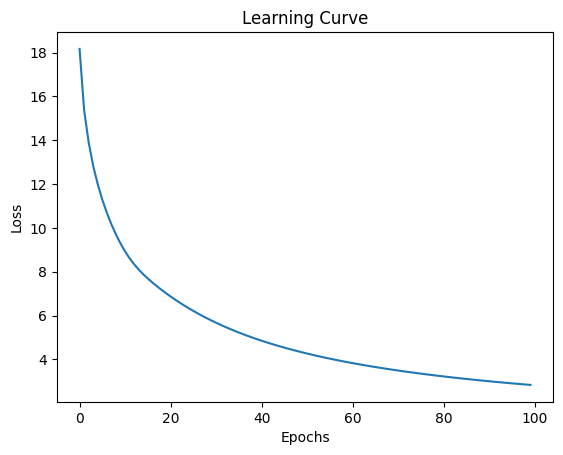

In [25]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.0
y = OneHotEncoder().fit_transform(y.values.reshape(-1, 1)).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define constants and hyperparameters
d = X_train.shape[1]  # Input dimension
d1 = 300  # Number of units in the hidden layer
k = 10  # Number of output classes
learning_rate = 0.1
epochs = 100

# Initialize weights
W1 = np.random.randn(d, d1)
W2 = np.random.randn(d1, k)

# Define sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Training loop with optimized vectorized operations
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2)
    y_hat = np.exp(z2 - np.max(z2, axis=1, keepdims=True)) / np.sum(np.exp(z2 - np.max(z2, axis=1, keepdims=True)), axis=1, keepdims=True)

    # Compute loss
    loss = -np.sum(y_train * np.log(y_hat)) / X_train.shape[0]
    losses.append(loss)

    # Backward pass
    dz2 = y_hat - y_train
    dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]

    # Update weights using stochastic gradient descent
    W2 -= learning_rate * dW2
    W1 -= learning_rate * dW1

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

# Test model
z1_test = np.dot(X_test, W1)
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2)
y_hat_test = np.exp(z2_test - np.max(z2_test, axis=1, keepdims=True)) / np.sum(np.exp(z2_test - np.max(z2_test, axis=1, keepdims=True)), axis=1, keepdims=True)
test_error = -np.sum(y_test * np.log(y_hat_test)) / X_test.shape[0]
print(f'Test error: {test_error:.4f}')

# Plot learning curve
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()


In [30]:
np.random.uniform(low=-1, high=1, size=(d, d1))

array([[ 0.82513158, -0.11380429, -0.72367814, ..., -0.36193541,
        -0.95182937, -0.17010738],
       [-0.6591335 ,  0.95270371,  0.23040571, ...,  0.94076363,
        -0.58942654, -0.87734367],
       [ 0.21011804, -0.90268615,  0.29701617, ..., -0.42628552,
        -0.18333577,  0.08981674],
       ...,
       [ 0.25560742, -0.29613813,  0.48385276, ..., -0.84077962,
        -0.75882109, -0.08394558],
       [-0.81813811, -0.89744906, -0.76086834, ...,  0.49297446,
         0.01754683, -0.4677035 ],
       [ 0.35039017,  0.53391905,  0.96511964, ...,  0.9142322 ,
        -0.94539261, -0.75397745]])

Epoch [1/100], Loss: 2.2222
Epoch [2/100], Loss: 1.9797
Epoch [3/100], Loss: 1.6237
Epoch [4/100], Loss: 1.2865
Epoch [5/100], Loss: 1.0443
Epoch [6/100], Loss: 0.8809
Epoch [7/100], Loss: 0.7684
Epoch [8/100], Loss: 0.6878
Epoch [9/100], Loss: 0.6276
Epoch [10/100], Loss: 0.5812
Epoch [11/100], Loss: 0.5443
Epoch [12/100], Loss: 0.5144
Epoch [13/100], Loss: 0.4898
Epoch [14/100], Loss: 0.4690
Epoch [15/100], Loss: 0.4514
Epoch [16/100], Loss: 0.4363
Epoch [17/100], Loss: 0.4232
Epoch [18/100], Loss: 0.4117
Epoch [19/100], Loss: 0.4015
Epoch [20/100], Loss: 0.3925
Epoch [21/100], Loss: 0.3843
Epoch [22/100], Loss: 0.3770
Epoch [23/100], Loss: 0.3703
Epoch [24/100], Loss: 0.3641
Epoch [25/100], Loss: 0.3585
Epoch [26/100], Loss: 0.3533
Epoch [27/100], Loss: 0.3485
Epoch [28/100], Loss: 0.3439
Epoch [29/100], Loss: 0.3397
Epoch [30/100], Loss: 0.3357
Epoch [31/100], Loss: 0.3319
Epoch [32/100], Loss: 0.3284
Epoch [33/100], Loss: 0.3250
Epoch [34/100], Loss: 0.3218
Epoch [35/100], Loss: 0

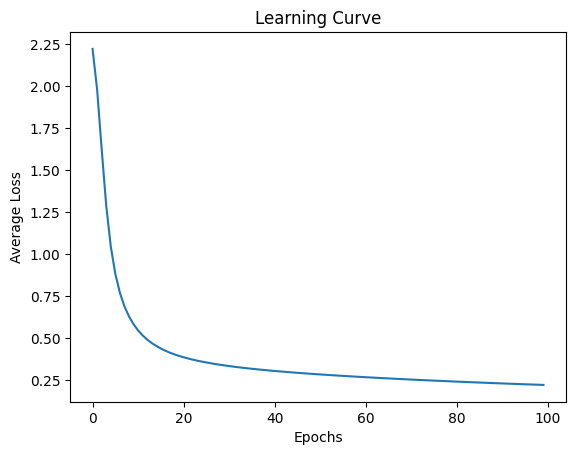

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Define network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize network and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
losses = []
# Training loop
for epoch in range(100):
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{100}], Loss: {epoch_loss:.4f}')

# Test model
correct = 0
total = 0
for images, labels in test_loader:
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test error:', 1 - correct / total)


plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Learning Curve')
plt.show()


C:\Users\devme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch [1/10], Loss: 17.0647
Epoch [2/10], Loss: 8.4315
Epoch [3/10], Loss: 6.2679
Epoch [4/10], Loss: 5.6389
Epoch [5/10], Loss: 5.3015
Epoch [6/10], Loss: 5.0778
Epoch [7/10], Loss: 4.9047
Epoch [8/10], Loss: 4.7522
Epoch [9/10], Loss: 4.6094
Epoch [10/10], Loss: 4.4733
Test error: 4.3561


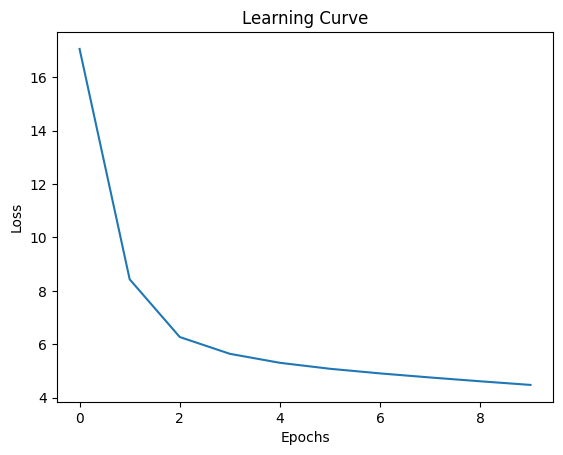

In [31]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.0
y = OneHotEncoder().fit_transform(y.values.reshape(-1, 1)).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define constants and hyperparameters
d = X_train.shape[1]  # Input dimension
d1 = 300  # Number of units in the hidden layer
k = 10  # Number of output classes
learning_rate = 0.1
epochs = 10

# Initialize weights
W1 = np.random.uniform(low=-1, high=1, size=(d, d1))
W2 = np.random.uniform(low=-1, high=1, size=(d1, k))

# Define sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Training loop with optimized vectorized operations
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2)
    y_hat = np.exp(z2 - np.max(z2, axis=1, keepdims=True)) / np.sum(np.exp(z2 - np.max(z2, axis=1, keepdims=True)), axis=1, keepdims=True)

    # Compute loss
    loss = -np.sum(y_train * np.log(y_hat)) / X_train.shape[0]
    losses.append(loss)

    # Backward pass
    dz2 = y_hat - y_train
    dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]

    # Update weights using stochastic gradient descent
    W2 -= learning_rate * dW2
    W1 -= learning_rate * dW1

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

# Test model
z1_test = np.dot(X_test, W1)
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2)
y_hat_test = np.exp(z2_test - np.max(z2_test, axis=1, keepdims=True)) / np.sum(np.exp(z2_test - np.max(z2_test, axis=1, keepdims=True)), axis=1, keepdims=True)
test_error = -np.sum(y_test * np.log(y_hat_test)) / X_test.shape[0]
print(f'Test error: {test_error:.4f}')

# Plot learning curve
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()


C:\Users\devme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch [1/10], Loss: 2.3026
Epoch [2/10], Loss: 2.3013
Epoch [3/10], Loss: 2.3012
Epoch [4/10], Loss: 2.3012
Epoch [5/10], Loss: 2.3012
Epoch [6/10], Loss: 2.3012
Epoch [7/10], Loss: 2.3012
Epoch [8/10], Loss: 2.3012
Epoch [9/10], Loss: 2.3012
Epoch [10/10], Loss: 2.3012
Test error: 2.3009


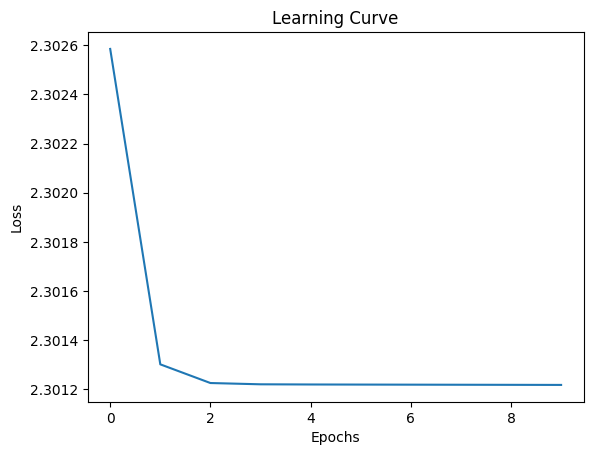

In [35]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.0
y = OneHotEncoder().fit_transform(y.values.reshape(-1, 1)).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define constants and hyperparameters
d = X_train.shape[1]  # Input dimension
d1 = 300  # Number of units in the hidden layer
k = 10  # Number of output classes
learning_rate = 0.1
epochs = 10

# Initialize weights
W1 = np.random.randn(d, d1)
W2 = np.random.randn(d1, k)
W1 = W1*0
W2 = W2*0

# Define sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Training loop with optimized vectorized operations
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2)
    y_hat = np.exp(z2 - np.max(z2, axis=1, keepdims=True)) / np.sum(np.exp(z2 - np.max(z2, axis=1, keepdims=True)), axis=1, keepdims=True)

    # Compute loss
    loss = -np.sum(y_train * np.log(y_hat)) / X_train.shape[0]
    losses.append(loss)

    # Backward pass
    dz2 = y_hat - y_train
    dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]

    # Update weights using stochastic gradient descent
    W2 -= learning_rate * dW2
    W1 -= learning_rate * dW1

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

# Test model
z1_test = np.dot(X_test, W1)
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2)
y_hat_test = np.exp(z2_test - np.max(z2_test, axis=1, keepdims=True)) / np.sum(np.exp(z2_test - np.max(z2_test, axis=1, keepdims=True)), axis=1, keepdims=True)
test_error = -np.sum(y_test * np.log(y_hat_test)) / X_test.shape[0]
print(f'Test error: {test_error:.4f}')

# Plot learning curve
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()
